# Least Squares
In this homework we find a method to find the least-squares solution using gradient descent with a constant step size. In this code, we will compare the closed form solution to the iteratively solved solution.

In [1]:
#Run these to import all of the necessary files
import numpy as np
import matplotlib as plt
from pylab import *

# Plots graphs in the browser window
%matplotlib inline

In [2]:
#generate A matrix and y vector to use least squares regression
#this code takes a while to run
np.random.seed(16)
A = np.random.rand(30,2)
y = np.random.rand(A.shape[0],1)


## a)
Create the function LS_closed_sol which takes in a matrix A and vector y and returns the square error using the closed form solution of least squares regression. 
As a reminder, the squared error is: $$||A\vec{x}-\vec{y}||^2$$
The closed form solution for $\vec{x}$ is: $$\vec{x} = (A^TA)^{-1}A^T\vec{y}$$

In [3]:
def least_squares_closed_form_sol(A,y):
    """
    The following function computes the least squares solution x_star
    Inputs: 
    A : data matrix
    y : desired output
    
    Ouputs: 
    e_star : least squared error possible for the given system
    x_star : least squares solution for x
    y_star : best approximation of y
    """
    x_star = np.linalg.inv(A.T @ A) @ A.T @ y
    y_star = A @ x_star
    e_star = np.linalg.norm(y_star - y) ** 2
    return e_star, x_star, y_star

In [4]:
least_squares_closed_form_sol(A,y)

(3.603076619462978,
 array([[0.74698716],
        [0.23025362]]),
 array([[0.28725582],
        [0.42186693],
        [0.320825  ],
        [0.55216935],
        [0.26920293],
        [0.43902077],
        [0.57628737],
        [0.25453343],
        [0.62725775],
        [0.26353203],
        [0.30159563],
        [0.53181229],
        [0.24492766],
        [0.68715636],
        [0.75508509],
        [0.20585041],
        [0.19754328],
        [0.43893528],
        [0.65267015],
        [0.19934681],
        [0.76406678],
        [0.23739863],
        [0.30794776],
        [0.21089607],
        [0.77929977],
        [0.27046842],
        [0.51378609],
        [0.68905294],
        [0.47712   ],
        [0.91261997]]))

## B)
Given the step size $\alpha$, we can create our function to iteratively solve for $\vec{x}$.

Create a function `least_squares_gradient_descent(A, y, alpha, x0, iters)` which takes as input a matrix `A`, vector `y`, learning rate `alpha`, initialization `x0`, and number of iterations `iters`. The function should calculate 
    $$\vec{x}[i+1] = \vec{x}[i]-\alpha A^T(A\vec{x}[i]-\vec{y})$$ 
up to time step $\vec{x}(\text{iters} - 1)$ as well as the squared error at each time step. The function should return an array which contains the squared error $||A\vec{x}[i]-\vec{y}||^2$, $x[i]$ and $Ax[i]$ for each time step.

In [5]:
def least_squares_gradient_descent(A, y, alpha, x0, iters):
    """
    The following function iteratively calculates x(t) for the 
    following discrete time system:
        x[i + 1] = x[i] - alpha*A^T(Ax[i] - y)
    input: 
        A : Data matrix
        y : Desired output
        alpha : step size in gradient descent
        x0 : guess solution to equation A*x2 = y
        iters : number of iterations for which x(t) is computed
    output:
        e : Squared error |A*x[i] - y[i]|^2 for each time step
        x : x[i] for all time steps
        y : y[i] = A*x[i] for all time steps
    """
    es = []
    xs = []
    y_hats = []

    x = x0
    for _ in range(iters):
        x = x - alpha * A.T @ (A @ x - y)
        y_hat = A @ x
        es.append(np.linalg.norm(y_hat - y) ** 2)
        xs.append(x)
        y_hats.append(y_hat)
    return np.array(es), np.array(xs), np.array(y_hats)

## C) 

Now, let's plot the convergence of $x[i]$ and $y[i]$ as time progresses. Let's also plot their norms and the error as a function of time. 

Before you run the following code block, take a minute to guess how these plots would look. Do they make sense?

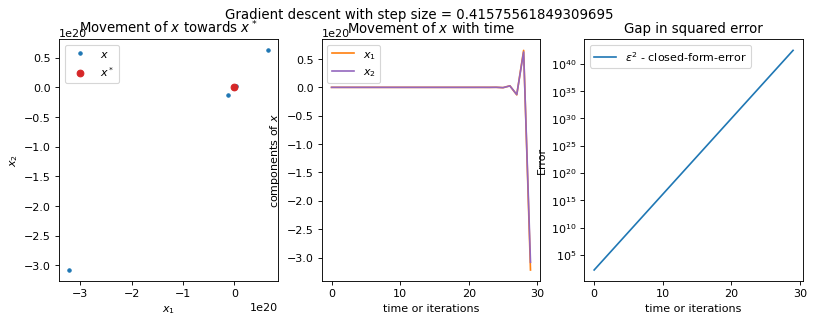

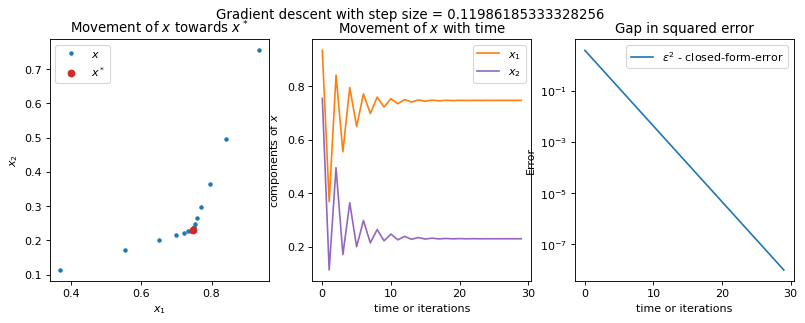

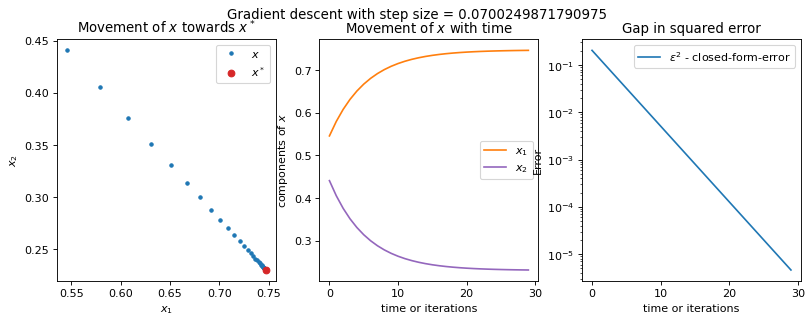

In [6]:
# First let's find the minimum and maximum eigenvalues
l, v = np.linalg.eig(A.T.dot(A))
l_min = np.min(l)
l_max = np.max(l)

# Next, let's calculate the least squares x_star, y_star and error e2
e_star, x_star, y_star = least_squares_closed_form_sol(A, y)



# Finally, let's see how our solution x_iter and error evolves with 
# time/iterations
alpha_arr = [1/l_min, 2/(l_min + l_max), 1/l_max]
x0 = np.zeros((A.shape[1], 1))
iters = 30

for alpha in alpha_arr:
    e_iter, x_iter, y_iter = least_squares_gradient_descent(A, y, alpha, x0, iters)
    delta_e = e_iter - e_star
    
    fig=plt.figure(figsize=(12, 4), dpi= 80, facecolor='w', edgecolor='k')
    fig.suptitle('Gradient descent with step size = ' + str(alpha))
    plt.subplot(131)
    plt.title('Movement of $x$ towards $x^*$')
    plt.plot(x_iter[:, 0], x_iter[:, 1], '.', color='tab:blue')
    plt.plot(x_star[0], x_star[1], 'o', color='tab:red')
    plt.xlabel('$x_1$'); plt.ylabel('$x_2$')
    plt.legend(['$x$', '$x^*$'])

    plt.subplot(132)
    plt.title('Movement of $x$ with time')
    plt.plot(np.arange(iters), x_iter[:, 0], '-', color='tab:orange')
    plt.plot(np.arange(iters), x_iter[:, 1], '-', color='tab:purple')
    plt.xlabel('time or iterations'); plt.ylabel('components of $x$')
    plt.legend(['$x_1$', '$x_2$'])

    plt.subplot(133)
    plt.title('Gap in squared error')
    plt.plot(np.arange(iters), delta_e)
    plt.xlabel('time or iterations'); plt.ylabel('Error')
    plt.yscale('log')
    plt.legend(['$\epsilon^2$ - closed-form-error'])

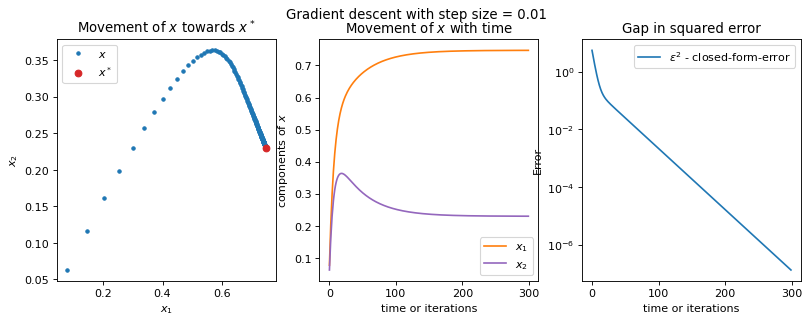

In [7]:
# Let's try this approach where the step size is even smaller! 
# and we can use more steps, to be near to a `continuous` approach to the solution
alpha_arr = [.01]
x0 = np.zeros((A.shape[1], 1))
iters = 300

for alpha in alpha_arr:
    e_iter, x_iter, y_iter = least_squares_gradient_descent(A, y, alpha, x0, iters)
    delta_e = e_iter - e_star
    
    fig=plt.figure(figsize=(12, 4), dpi= 80, facecolor='w', edgecolor='k')
    fig.suptitle('Gradient descent with step size = ' + str(alpha))
    plt.subplot(131)
    plt.title('Movement of $x$ towards $x^*$')
    plt.plot(x_iter[:, 0], x_iter[:, 1], '.', color='tab:blue')
    plt.plot(x_star[0], x_star[1], 'o', color='tab:red')
    plt.xlabel('$x_1$'); plt.ylabel('$x_2$')
    plt.legend(['$x$', '$x^*$'])

    plt.subplot(132)
    plt.title('Movement of $x$ with time')
    plt.plot(np.arange(iters), x_iter[:, 0], '-', color='tab:orange')
    plt.plot(np.arange(iters), x_iter[:, 1], '-', color='tab:purple')
    plt.xlabel('time or iterations'); plt.ylabel('components of $x$')
    plt.legend(['$x_1$', '$x_2$'])

    plt.subplot(133)
    plt.title('Gap in squared error')
    plt.plot(np.arange(iters), delta_e)
    plt.xlabel('time or iterations'); plt.ylabel('Error')
    plt.yscale('log')
    plt.legend(['$\epsilon^2$ - closed-form-error'])